# Convolutional Neural Network Tutorial
## using CIFAR-10 for Photo Classification
This notebook follows the tutorial [How to Develop a CNN from Scratch for CIFAR-10 Photo Classification](https://machinelearningmastery.com/how-to-develop-a-cnn-from-scratch-for-cifar-10-photo-classification/) on [Machine Learning Mastery](https://machinelearningmastery.com).

The goal is to build a "test harness" for a convolutional neural network. A test harness can also be called an "automated testing framework", which may be more conducive to gauging its meaning at face value.  

In [44]:
import sys
from matplotlib import pyplot as plt
from keras.utils import to_categorical
from keras.models import Sequential
from keras.layers import Conv2D
from keras.layers import MaxPooling2D
from keras.layers import Dense
from keras.layers import Flatten
from keras.layers import Dropout
from keras.layers import BatchNormalization
from keras.optimizers import SGD
from keras.regularizers import l2
from keras.preprocessing.image import ImageDataGenerator

In [2]:
# Load the cifar10 dataset library from keras
from keras.datasets import cifar10

### Probe the Data

In [3]:
# Load the data set, which returns a pair of tuples
(trainX, trainy), (testX, testy) = cifar10.load_data()

# Get the size summary of the dataset
print("Train: X", trainX.shape, "y", trainy.shape)
print("Test:  X", testX.shape, "y", testy.shape)

Train: X (50000, 32, 32, 3) y (50000, 1)
Test:  X (10000, 32, 32, 3) y (10000, 1)


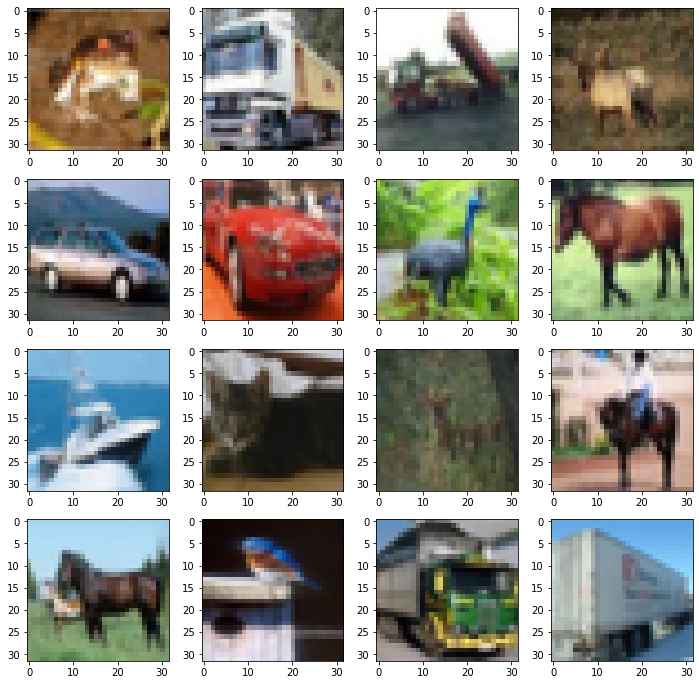

In [4]:
# View the first few images

# Make the figure larger than default
plt.figure(figsize=(12,12))

for i in range(16):
    # Set up the grid of subplots, and focussing on one starting from cell 1.
    plt.subplot(4, 4, 1 + i)
    # Plot the raw image
    plt.imshow(trainX[i])
    
# Display the images
plt.show()

### Test Harness
*From the tutorial's text:*
> The design of the test harness is modular, and we can develop a separate function for each piece. This allows a given aspect of the test harness to be modified or interchanged, if we desire, separately from the rest.
> 
> We can develop this test harness with five key elements. They are the loading of the dataset, the preparation of the dataset, the definition of the model, the evaluation of the model, and the presentation of results.

---
#### Define function to load and one-hot encode the data
using the code elements above.

In [22]:
def load_dataset():
    
    # Load the data set, which returns a pair of tuples
    (trainX, trainy), (testX, testy) = cifar10.load_data()
    
    # One-hot encode the target classification classes
    trainy = to_categorical(trainy)
    testy = to_categorical(testy)
    
    return trainX, trainy, testX, testy

---
#### Define function to normalise the pixel data
Colour channels (e.g. RGB) typically each have a range from 0 to 255 inclusive as unsigned integers. Without knowing any other limitations of colours in the individual images, it is typically still good to normalise the channel values to between 0 and 1.

In [23]:
def normalise_pixels(train, test):
    
    # Convert unsigned integers to floats
    train_norm = train.astype("float32")
    test_norm = test.astype("float32")
    
    # Normalise to [0, 1]
    train_norm = train_norm / 255.0
    test_norm = test_norm / 255.0
    
    return train_norm, test_norm

---
#### Define a neural network model
Details can be modified later on, as long as it returns a `model` object that Keras understands.

*Additional Notes:
From [the Keras documentation on "The Sequential model"](https://keras.io/guides/sequential_model/), a "Sequential model is appropriate for a plain stack of layers where each layer has exactly one input tensor and one output tensor."*

```
# A Keras model
def define_model():
    
    model = Sequential() # For plain structures.
    
    ### Model details ###
    # ...
    
    return model
```

Leave blank for now. This will be the core of exploring various model designs below.

---
#### Fit and evaluate the model
Model fitting is done through the `fit()` method of the model's class. For example,
```
history = model.fit(trainX, trainy, epochs = 100, batch_size = 64, validation_data = (testX, testy), verbose = 0)
```
goes through 100 training epochs, each with batch size of 64. An epoch is one training iteration over the entire training set provided; here, it represents the terminating index of the epoch rather than the actual number of epochs underwent. Batch size is the number of data samples to give the network for each neuron weight / gradient adjustments. A dicussion on batch sizes can be found in [this blog post](https://machinelearningmastery.com/use-different-batch-sizes-training-predicting-python-keras/). See [Keras' documentation on Model Training APIs](https://keras.io/api/models/model_training_apis/) for more details on the `fit()` method. Also from [Keras' documentation](https://keras.io/guides/training_with_built_in_methods/), regarding the return value of the `fit()` method: 
> The returned "history" object holds a record of the loss values and metric values during training:
> ```
> history.history
> ```
>
> ```
> {'loss': [0.34767386317253113, 0.1630229949951172],
 'sparse_categorical_accuracy': [0.9023799896240234, 0.951479971408844],
 'val_loss': [0.19535799324512482, 0.12865379452705383],
 'val_sparse_categorical_accuracy': [0.9452999830245972, 0.9617999792098999]}
> ```
>

Evaluation can be done after the fitting:
```
testloss = model.evaluate(testX, testy, verbose = 0)
```
where `testloss` is a list of scalar test losses whose values correspond to the labels of metrics given by `model.metrics_names` (or `print(model.metrics_names)`). Without defning custom metrics or loss meaures, the return value of the `evaluate()` function (`testloss` in this case) is typically `[<loss>, <accuracy>]`. See [Keras' documentation on Model Training APIs](https://keras.io/api/models/model_training_apis/) or [this StackOverflow question](https://stackoverflow.com/questions/51299836/what-values-are-returned-from-model-evaluate-in-keras) for details.

---
#### Model Performance and Diagnostics
Make use of the `history` output (which is a `history` object) from the `fit()` method discussed above. It is useful to note that the '`val_`' prefix stands for "validation"; i.e., it is the value associated with the model's performance on test data (see [this Data Science StackExchange question](https://datascience.stackexchange.com/questions/25267/keras-difference-beetween-val-loss-and-loss-during-training)).

In [24]:
def summarise_diagnostics(history, filename = ""):
    
    # Loss
    plt.subplot(211)
    plt.title("Cross-entropy Loss")
    plt.plot(history.history["loss"], color = "blue", label = "train")
    plt.plot(history.history["val_loss"], color = "orange", label = "test")
    
    # Accuracy
    plt.subplot(212)
    plt.title("Classification Accuracy")
    plt.plot(history.history["accuracy"], color = "blue", label = "train")
    plt.plot(history.history["val_accuracy"], color = "orange", label = "test")
    
    # Save plot to file
    if not filename:
        filename = sys.argv[0].split('/')[-1] # Get only the filename part of the path of this script
    plt.savefig(filename + "_diagnostics.png")
    plt.close()

---
#### The Test Harness
Combine all the ingredients from above.

In [30]:
def run_test_harness(model = define_model(), filename = ""):
    
    # Load and one-hot encode the data
    trainX, trainy, testX, testy = load_dataset()
    
    # Normalise the pixel data
    trainX, testX = normalise_pixels(trainX, testX)
    
    # Define the model
    model = define_model()
    
    # Fit the model
    history = model.fit(trainX, trainy, epochs = 100, batch_size = 64, validation_data = (testX, testy), verbose = 0)
    
    # Evaluate the model
    testloss = model.evaluate(testX, testy, verbose = 0)
    print("Test accuracy: %.3f %%" % (testloss[1] * 100.))
    
    # Show the model performance diagnostics (learning curves)
    summarise_diagnostics(history, filename)
    

---
### Model Designs
---
For the following parts, it is best to follow the discussions in the [tutorial itself](https://machinelearningmastery.com/how-to-develop-a-cnn-from-scratch-for-cifar-10-photo-classification/) (the part below the heading "How to Develop a Baseline Model") for details.

Details on the VGG model, as cited in the tutorial, can be found in the paper, ["Very Deep Convolutional Networks for Large-Scale Image Recognition"](https://arxiv.org/abs/1409.1556). 

*Aside: VGG stands for Visual Geometry Group, which belongs to the Department of Engineering Science at the University of Oxford, where the authors of the above paper were based at the time of publication.*

**More information links:**
- [Convolutional Layers & how do they work (e.g. Conv2D)](https://machinelearningmastery.com/convolutional-layers-for-deep-learning-neural-networks/)
- [Pooling Layers in Keras (e.g. MaxPooling2D)](https://keras.io/api/layers/pooling_layers/)
- [Flatten in Keras: tile everything into a single plain, but keep the individual samples in a batch separate](https://keras.io/api/layers/reshaping_layers/flatten/)
- [Dense Layers in Keras](https://keras.io/api/layers/core_layers/dense/)
- [He initialisation to mitigate vanishing/exploding gradient issues (TensorFlow documentation with link to the He et al. [2015] paper)](https://www.tensorflow.org/api_docs/python/tf/keras/initializers/HeUniform)
- [Stochastic Gradient Descent (SGD) optimiser in Keras](https://keras.io/api/optimizers/sgd/)
- [Compiling the model in Keras](https://keras.io/api/optimizers/)

---
#### 1 VGG Block

In [24]:
def define_model():
	model = Sequential()
	model.add(Conv2D(32, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same', input_shape=(32, 32, 3)))
	model.add(Conv2D(32, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same'))
	model.add(MaxPooling2D((2, 2)))
	model.add(Flatten())
	model.add(Dense(128, activation='relu', kernel_initializer='he_uniform'))
	model.add(Dense(10, activation='softmax'))
    
    # Define optimiser
	opt = SGD(lr=0.001, momentum=0.9)
    
    # Compile the model and return it
	model.compile(optimizer=opt, loss='categorical_crossentropy', metrics=['accuracy'])
	return model

In [25]:
run_test_harness()

Test accuracy: 66.110 %


---
#### 2 VGG Blocks

In [44]:
def define_model():
    model = Sequential()
    
    # Block 1
    model.add(Conv2D(32, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same', input_shape=(32, 32, 3)))
    model.add(Conv2D(32, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same'))
    model.add(MaxPooling2D((2, 2)))
    
    # Block 2
    model.add(Conv2D(64, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same'))
    model.add(Conv2D(64, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same'))
    model.add(MaxPooling2D((2, 2)))
    
    model.add(Flatten())
    model.add(Dense(128, activation='relu', kernel_initializer='he_uniform'))
    model.add(Dense(10, activation='softmax'))

    # Define optimiser
    opt = SGD(lr=0.001, momentum=0.9)

    # Compile the model and return it
    model.compile(optimizer=opt, loss='categorical_crossentropy', metrics=['accuracy'])
    return model

In [45]:
run_test_harness()

Test accuracy: 70.620 %


---
#### 3 VGG Blocks

In [10]:
def define_model():
    model = Sequential()
    
    # Block 1
    model.add(Conv2D(32, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same', input_shape=(32, 32, 3)))
    model.add(Conv2D(32, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same'))
    model.add(MaxPooling2D((2, 2)))
    
    # Block 2
    model.add(Conv2D(64, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same'))
    model.add(Conv2D(64, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same'))
    model.add(MaxPooling2D((2, 2)))
    
    # Block 3
    model.add(Conv2D(128, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same'))
    model.add(Conv2D(128, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same'))
    model.add(MaxPooling2D((2, 2)))
    
    model.add(Flatten())
    model.add(Dense(128, activation='relu', kernel_initializer='he_uniform'))
    model.add(Dense(10, activation='softmax'))

    # Define optimiser
    opt = SGD(lr=0.001, momentum=0.9)

    # Compile the model and return it
    model.compile(optimizer=opt, loss='categorical_crossentropy', metrics=['accuracy'])
    return model

In [13]:
run_test_harness()

Test accuracy: 73.720 %


So far, the basic 1, 2, and 3 VGG-Block models have the accuracy of
 1. 66.110%
 2. 70.620%
 3. 73.720%
 
They can be improved with regularisation techniques.

---
#### Dropout Regularisation
A dropout layer can be added to any layer (except the output layer) to ignore the output of the layer with some probability. This probability is represented by the dropout rate (0 for complete dropping, 1 for full retention). In Keras, the dropout argument is the fraction to drop (i.e., 0.2 means a dropout rate of 0.8). 

In [48]:
def define_model():
    model = Sequential()
    
    # Block 1
    model.add(Conv2D(32, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same', input_shape=(32, 32, 3)))
    model.add(Conv2D(32, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same'))
    model.add(MaxPooling2D((2, 2)))
    model.add(Dropout(0.2))
    
    # Block 2
    model.add(Conv2D(64, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same'))
    model.add(Conv2D(64, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same'))
    model.add(MaxPooling2D((2, 2)))
    model.add(Dropout(0.2))
    
    # Block 3
    model.add(Conv2D(128, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same'))
    model.add(Conv2D(128, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same'))
    model.add(MaxPooling2D((2, 2)))
    model.add(Dropout(0.2))
    
    model.add(Flatten())
    model.add(Dense(128, activation='relu', kernel_initializer='he_uniform'))
    model.add(Dropout(0.2))
    model.add(Dense(10, activation='softmax'))

    # Define optimiser
    opt = SGD(lr=0.001, momentum=0.9)

    # Compile the model and return it
    model.compile(optimizer=opt, loss='categorical_crossentropy', metrics=['accuracy'])
    return model

In [49]:
run_test_harness()

Test accuracy: 82.710 %


Dropout regularisation achieved an improved test accuracy of 82.710%.

---
#### Weight Decay
A control on the size of the weights of each neuron/node can be imposed on the convolutional and fully connected layers. This limits the individual neurons to take up too much "responsibilities" of the fitting, and results in a more stable model. In Keras, this is implemented by adding (to a Conv2D or Dense layer) a `kernel_regularizer` argument, which may take squared-sum (`l2`) or absolute-magnitude (`l1`) measures, plus a weight parameter to specify the importance of weight regularisation during training. Try using a larger weight parameter for the weight decay, such as 0.1 or even 1.

In [10]:
def define_model():
    model = Sequential()
    
    # Block 1
    model.add(Conv2D(32, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same', kernel_regularizer=l2(0.001), input_shape=(32, 32, 3)))
    model.add(Conv2D(32, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same', kernel_regularizer=l2(0.001)))
    model.add(MaxPooling2D((2, 2)))
#     model.add(Dropout(0.2))
    
    # Block 2
    model.add(Conv2D(64, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same', kernel_regularizer=l2(0.001)))
    model.add(Conv2D(64, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same', kernel_regularizer=l2(0.001)))
    model.add(MaxPooling2D((2, 2)))
#     model.add(Dropout(0.2))
    
    # Block 3
    model.add(Conv2D(128, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same', kernel_regularizer=l2(0.001)))
    model.add(Conv2D(128, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same', kernel_regularizer=l2(0.001)))
    model.add(MaxPooling2D((2, 2)))
#     model.add(Dropout(0.2))
    
    model.add(Flatten())
    model.add(Dense(128, activation='relu', kernel_initializer='he_uniform', kernel_regularizer=l2(0.001)))
#     model.add(Dropout(0.2))
    model.add(Dense(10, activation='softmax'))

    # Define optimiser
    opt = SGD(lr=0.001, momentum=0.9)

    # Compile the model and return it
    model.compile(optimizer=opt, loss='categorical_crossentropy', metrics=['accuracy'])
    return model

In [11]:
run_test_harness()

Test accuracy: 74.220 %


---
#### Data Augmentation
This process works by making modified duplicates of existing training data to make the model learn the features more generally. For images, these modifications should still preserve the important features. Mirror flips, shifting, zooming or perhaps (depending on the nature of the objects imaged) small rotations or blurring are reasonable modification methods. Keras has the `ImageDataGenerator` class for this purpose.

In [37]:
def run_test_harness2(model = define_model(), testname = ""):
    
    # Load and one-hot encode the data
    trainX, trainy, testX, testy = load_dataset()
    
    # Normalise the pixel data
    trainX, testX = normalise_pixels(trainX, testX)
    
    # Create ImageDataGenerator object, then create an iterator from it
    datagen = ImageDataGenerator(width_shift_range = 0.1, height_shift_range = 0.1, horizontal_flip = True)
    datagenflow = datagen.flow(trainX, trainy, batch_size = 64)
    
    # Fit the model
    steps = int(trainX.shape[0] / 64) # Divide the size of the training set by the batch size
    history = model.fit(datagenflow, steps_per_epoch = steps, epochs = 100, validation_data = (testX, testy), verbose = 0)
    
    # Evaluate the model
    testloss = model.evaluate(testX, testy, verbose = 0)
    print("Test accuracy: %.3f %%" % (testloss[1] * 100.))
    
    # Show the model performance diagnostics (learning curves)
    summarise_diagnostics(history, testname)

In [25]:
# The 3 VGG model is reused here.
def define_model():
    model = Sequential()
    
    # Block 1
    model.add(Conv2D(32, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same', input_shape=(32, 32, 3)))
    model.add(Conv2D(32, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same'))
    model.add(MaxPooling2D((2, 2)))
    
    # Block 2
    model.add(Conv2D(64, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same'))
    model.add(Conv2D(64, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same'))
    model.add(MaxPooling2D((2, 2)))
    
    # Block 3
    model.add(Conv2D(128, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same'))
    model.add(Conv2D(128, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same'))
    model.add(MaxPooling2D((2, 2)))
    
    model.add(Flatten())
    model.add(Dense(128, activation='relu', kernel_initializer='he_uniform'))
    model.add(Dense(10, activation='softmax'))

    # Define optimiser
    opt = SGD(lr=0.001, momentum=0.9)

    # Compile the model and return it
    model.compile(optimizer=opt, loss='categorical_crossentropy', metrics=['accuracy'])
    return model

In [29]:
run_test_harness2(define_model(), "3VGG-datagen")

Test accuracy: 82.890 %


---
#### Varying Dropout Regularisation
For example, increase the dropout in successive layers, forcing deeper layers to regularise more.

In [31]:
def define_model():
    model = Sequential()
    
    # Block 1
    model.add(Conv2D(32, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same', input_shape=(32, 32, 3)))
    model.add(Conv2D(32, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same'))
    model.add(MaxPooling2D((2, 2)))
    model.add(Dropout(0.2))
    
    # Block 2
    model.add(Conv2D(64, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same'))
    model.add(Conv2D(64, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same'))
    model.add(MaxPooling2D((2, 2)))
    model.add(Dropout(0.3))
    
    # Block 3
    model.add(Conv2D(128, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same'))
    model.add(Conv2D(128, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same'))
    model.add(MaxPooling2D((2, 2)))
    model.add(Dropout(0.4))
    
    model.add(Flatten())
    model.add(Dense(128, activation='relu', kernel_initializer='he_uniform'))
    model.add(Dropout(0.5))
    model.add(Dense(10, activation='softmax'))

    # Define optimiser
    opt = SGD(lr=0.001, momentum=0.9)

    # Compile the model and return it
    model.compile(optimizer=opt, loss='categorical_crossentropy', metrics=['accuracy'])
    return model

In [32]:
run_test_harness(define_model(), "varyingdropout")

Test accuracy: 82.740 %


---
#### Varying Dropout + Data Augmentation

In [40]:
def define_model():
    model = Sequential()
    
    # Block 1
    model.add(Conv2D(32, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same', input_shape=(32, 32, 3)))
    model.add(Conv2D(32, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same'))
    model.add(MaxPooling2D((2, 2)))
    model.add(Dropout(0.2))
    
    # Block 2
    model.add(Conv2D(64, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same'))
    model.add(Conv2D(64, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same'))
    model.add(MaxPooling2D((2, 2)))
    model.add(Dropout(0.2))
    
    # Block 3
    model.add(Conv2D(128, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same'))
    model.add(Conv2D(128, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same'))
    model.add(MaxPooling2D((2, 2)))
    model.add(Dropout(0.2))
    
    model.add(Flatten())
    model.add(Dense(128, activation='relu', kernel_initializer='he_uniform'))
    model.add(Dropout(0.2))
    model.add(Dense(10, activation='softmax'))

    # Define optimiser
    opt = SGD(lr=0.001, momentum=0.9)

    # Compile the model and return it
    model.compile(optimizer=opt, loss='categorical_crossentropy', metrics=['accuracy'])
    return model

In [41]:
run_test_harness2(define_model(), "3VGG-dropout-datagen")

Test accuracy: 83.350 %


---
#### Varying Dropout + Data Augmentation + Batch Normalisation
Batch Normalisation (implemented as a [`BatchNormalization()` layer in Keras](https://keras.io/api/layers/normalization_layers/batch_normalization/)) standardise the input such that they have a mean of 0 and standard deviation of 1. The research article that gave rise to this can be found here: [Ioffe and Szegedy (2015)](https://arxiv.org/abs/1502.03167).

In [45]:
def define_model():
    model = Sequential()
    
    # Block 1
    model.add(Conv2D(32, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same', input_shape=(32, 32, 3)))
    model.add(BatchNormalization())
    model.add(Conv2D(32, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same'))
    model.add(BatchNormalization())
    model.add(MaxPooling2D((2, 2)))
    model.add(Dropout(0.2))
    
    # Block 2
    model.add(Conv2D(64, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same'))
    model.add(BatchNormalization())
    model.add(Conv2D(64, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same'))
    model.add(BatchNormalization())
    model.add(MaxPooling2D((2, 2)))
    model.add(Dropout(0.3))
    
    # Block 3
    model.add(Conv2D(128, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same'))
    model.add(BatchNormalization())
    model.add(Conv2D(128, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same'))
    model.add(BatchNormalization())
    model.add(MaxPooling2D((2, 2)))
    model.add(Dropout(0.4))
    
    model.add(Flatten())
    model.add(Dense(128, activation='relu', kernel_initializer='he_uniform'))
    model.add(BatchNormalization())
    model.add(Dropout(0.5))
    model.add(Dense(10, activation='softmax'))

    # Define optimiser
    opt = SGD(lr=0.001, momentum=0.9)

    # Compile the model and return it
    model.compile(optimizer=opt, loss='categorical_crossentropy', metrics=['accuracy'])
    return model

In [46]:
# Change epoch to 400, and
# Add line to save the model;
# No other changes otherwise.
def run_test_harness2(model = define_model(), testname = ""):
    
    # Load and one-hot encode the data
    trainX, trainy, testX, testy = load_dataset()
    
    # Normalise the pixel data
    trainX, testX = normalise_pixels(trainX, testX)
    
    # Create ImageDataGenerator object, then create an iterator from it
    datagen = ImageDataGenerator(width_shift_range = 0.1, height_shift_range = 0.1, horizontal_flip = True)
    datagenflow = datagen.flow(trainX, trainy, batch_size = 64)
    
    # Fit the model
    steps = int(trainX.shape[0] / 64) # Divide the size of the training set by the batch size
    history = model.fit(datagenflow, steps_per_epoch = steps, epochs = 400, validation_data = (testX, testy), verbose = 0)
    
    # Evaluate the model
    testloss = model.evaluate(testX, testy, verbose = 0)
    print("Test accuracy: %.3f %%" % (testloss[1] * 100.))
    
    # Show the model performance diagnostics (learning curves)
    summarise_diagnostics(history, testname)
    
    # Save the model
    model.save(testname + ".h5")

In [47]:
run_test_harness2(define_model(), "3VGG-varyingdropout-datagen-batchnorm")

Test accuracy: 88.600 %


---
### Save the Model
---
Note the model-saving line in the above, last definition of `run_test_harness2`:
```
model.save("some_model_filename.h5")
```
which requires the `h5py` library having been installed.

---
### Model Evaluation
---
A saved model can be loaded with the `load_model()` function, as in, for example:
```
model = load_model("your_favourite_model.h5")
```
and then used in the regular manner.